In [179]:
# Import the shot data.
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, plot_roc_curve, average_precision_score, \
    plot_precision_recall_curve

DATA_FOLDER = 'data/'
DATAFRAME_FILE = DATA_FOLDER + 'processed_data.pkl'

current_dir = Path.cwd()
frame_path = current_dir.joinpath(DATAFRAME_FILE)
shots_df = pd.read_pickle(str(frame_path))

In [2]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118280 entries, 0 to 118279
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   period               118280 non-null  int64  
 1   seconds_remaining    118280 non-null  int64  
 2   att_score            118280 non-null  int32  
 3   def_score            118280 non-null  int32  
 4   lead_size            118280 non-null  int32  
 5   att_players          118268 non-null  Int64  
 6   att_skaters          118268 non-null  Int64  
 7   att_forwards         118268 non-null  Int64  
 8   def_players          118268 non-null  Int64  
 9   def_skaters          118268 non-null  Int64  
 10  def_forwards         118268 non-null  Int64  
 11  event_coord_x        118277 non-null  float64
 12  event_coord_y        118278 non-null  float64
 13  is_playoff_game      118280 non-null  int32  
 14  is_home              118280 non-null  int32  
 15  is_overtime      

In [3]:
pd.set_option('display.max_columns', None)
shots_df.head()

,period,seconds_remaining,att_score,def_score,lead_size,att_players,att_skaters,att_forwards,def_players,def_skaters,def_forwards,event_coord_x,event_coord_y,is_playoff_game,is_home,is_overtime,is_extra_attacker,is_empty_net,is_rebound,is_goal,shot_type_backhand,shot_type_deflected,shot_type_slap,shot_type_snap,shot_type_tip,shot_type_wrap,shot_type_wrist
0,1,1171,0,0,0,6,5,3,6,5,3,78.0,-19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1151,0,0,0,6,5,3,6,5,3,37.0,10.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1140,0,0,0,6,5,3,6,5,3,47.0,-23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,971,0,0,0,6,5,3,6,5,3,73.0,22.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,966,0,0,0,6,5,3,6,5,3,53.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
shots_df.describe().T

,count,mean,std,min,25%,50%,75%,max
period,118280.0,2.023174,0.838962,1.0,1.0,2.0,3.0,5.0
seconds_remaining,118280.0,593.051530,347.601714,0.0,288.0,596.0,896.0,1200.0
att_score,118280.0,1.308750,1.369216,0.0,0.0,1.0,2.0,9.0
def_score,118280.0,1.425042,1.434907,0.0,0.0,1.0,2.0,9.0
lead_size,118280.0,-0.116292,1.601392,-8.0,-1.0,0.0,1.0,8.0
att_players,118268.0,5.939527,0.278203,4.0,6.0,6.0,6.0,6.0
att_skaters,118268.0,4.959710,0.313196,3.0,5.0,5.0,5.0,6.0
att_forwards,118268.0,3.084173,0.442879,1.0,3.0,3.0,3.0,6.0
def_players,118268.0,5.826259,0.418524,4.0,6.0,6.0,6.0,6.0
def_skaters,118268.0,4.832271,0.427537,3.0,5.0,5.0,5.0,6.0


# Imputation

In [5]:
skater_cols = ['att_players', 'att_skaters', 'att_forwards', 'def_players', 'def_skaters', 'def_forwards']

In [6]:
shots_df[shots_df.att_players.isna()]

,period,seconds_remaining,att_score,def_score,lead_size,att_players,att_skaters,att_forwards,def_players,def_skaters,def_forwards,event_coord_x,event_coord_y,is_playoff_game,is_home,is_overtime,is_extra_attacker,is_empty_net,is_rebound,is_goal,shot_type_backhand,shot_type_deflected,shot_type_slap,shot_type_snap,shot_type_tip,shot_type_wrap,shot_type_wrist
715,3,94,1,2,-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,86.0,14.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
23157,3,427,1,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,88.0,-30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23244,2,96,2,1,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,79.0,-9.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
26424,1,665,0,1,-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44.0,-5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
30850,1,1088,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,65.0,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30851,1,1087,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,69.0,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
30852,1,1074,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,47.0,-3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34007,2,382,3,4,-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,64.0,-16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55920,2,295,3,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,75.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
90913,1,370,1,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,59.0,-18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In general, the assumption should be that both teams are skating at even strength. One of the missing data points indicates that the attackers have pulled their goalie. This will change the `att_skaters` value, but the remainder will be imputed with the mode. 

In [7]:
shots_df[shots_df.is_extra_attacker == 0][skater_cols].mode()

,att_players,att_skaters,att_forwards,def_players,def_skaters,def_forwards
0,6,5,3,6,5,3


In [8]:
values = dict(shots_df[shots_df.is_extra_attacker == 0][skater_cols].mode().squeeze())
values

{'att_players': 6,
 'att_skaters': 5,
 'att_forwards': 3,
 'def_players': 6,
 'def_skaters': 5,
 'def_forwards': 3}

In [9]:
shots_df.loc[shots_df.is_extra_attacker == 0, skater_cols] = \
    shots_df.loc[shots_df.is_extra_attacker == 0, skater_cols].fillna(values)

In [10]:
shots_df[shots_df.is_extra_attacker == 1].mode()

,period,seconds_remaining,att_score,def_score,lead_size,att_players,att_skaters,att_forwards,def_players,def_skaters,def_forwards,event_coord_x,event_coord_y,is_playoff_game,is_home,is_overtime,is_extra_attacker,is_empty_net,is_rebound,is_goal,shot_type_backhand,shot_type_deflected,shot_type_slap,shot_type_snap,shot_type_tip,shot_type_wrap,shot_type_wrist
0,3,1,1,3,-1,6,6,4,6,5,3,81.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
values = dict(shots_df[shots_df.is_extra_attacker == 1][skater_cols].mode().squeeze())
values

{'att_players': 6,
 'att_skaters': 6,
 'att_forwards': 4,
 'def_players': 6,
 'def_skaters': 5,
 'def_forwards': 3}

In [12]:
shots_df.loc[shots_df.is_extra_attacker == 1, skater_cols] = \
    shots_df.loc[shots_df.is_extra_attacker == 1, skater_cols].fillna(values)

In [13]:
shots_df[shots_df.att_players.isna()]

,period,seconds_remaining,att_score,def_score,lead_size,att_players,att_skaters,att_forwards,def_players,def_skaters,def_forwards,event_coord_x,event_coord_y,is_playoff_game,is_home,is_overtime,is_extra_attacker,is_empty_net,is_rebound,is_goal,shot_type_backhand,shot_type_deflected,shot_type_slap,shot_type_snap,shot_type_tip,shot_type_wrap,shot_type_wrist


The event coords will be filled with the column means.

In [14]:
shots_df.fillna(shots_df.mean(), inplace=True)

In [15]:
# Verify all values have been imputed.
shots_df.isna().sum()

period                 0
seconds_remaining      0
att_score              0
def_score              0
lead_size              0
att_players            0
att_skaters            0
att_forwards           0
def_players            0
def_skaters            0
def_forwards           0
event_coord_x          0
event_coord_y          0
is_playoff_game        0
is_home                0
is_overtime            0
is_extra_attacker      0
is_empty_net           0
is_rebound             0
is_goal                0
shot_type_backhand     0
shot_type_deflected    0
shot_type_slap         0
shot_type_snap         0
shot_type_tip          0
shot_type_wrap         0
shot_type_wrist        0
dtype: int64

# Classification

In [16]:
y = shots_df['is_goal'].astype(int)
X = shots_df.drop('is_goal', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=shots_df['is_goal'], random_state=42)

In [18]:
def goal_prob(y):
    return sum(y)/len(y)
print(f"Probability of goal in sample: {goal_prob(y):.3f}")

Probability of goal in sample: 0.068


Experimentation has shown that although most columns are already scaled, using the standard scaler leads to faster results when using Logistic Regression.

In [19]:
from imblearn.pipeline import Pipeline as Pipeline_With_Sampler
from sklearn.preprocessing import StandardScaler

def make_classifier_pipeline(estimator=None, sampler=None, scaler=StandardScaler()):
    pipeline = Pipeline_With_Sampler([        
        ('scaler', scaler),
        ('sampler', sampler),
        ('estimator', estimator)
    ])
    return pipeline

The class `classifier_tracker` is meant for tracking a variety of metrics as well as allowing for easy retrieval of classifiers (although this functionality ended up unused). 

The metrics included were:
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [Balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [Jaccard score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html)
- [Fowlkes-Mallows Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html)
- [Matthews correlation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)
- [True positive and negtive rates](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) (The true positve rate is identical to the recall)
- [Positive and negative predictive value](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values)

Also tracked were the predicted distribution (the proportion of test fold predictions classified as 'goal') and the time that it took to fit each model.

In [188]:
from sklearn import metrics
import numpy as np
from time import time
from sklearn.pipeline import Pipeline

# Adapted from code found at https://imbalanced-learn.org/.
# Original page has been updated. The original code can be found using the Wayback Machine at
# https://web.archive.org/web/20200919051559/https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html
class classifier_tracker:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.__eval_scores = pd.DataFrame()
        self.__classifiers = {}
        self.__X_train = X_train
        self.__y_train = y_train
        self.__X_test = X_test
        self.__y_test = y_test
    
    def add_classifier(self, clf, desc=None):
        scores = self.get_scores(clf)
    
        clf_name, clf_desc = self.get_identifier(clf, desc)
        
        if self.__eval_scores.index.isin([(clf_name, clf_desc)]).any():
            self.__eval_scores = self.__eval_scores.drop((clf_name, clf_desc))

        clf_score = pd.DataFrame(scores,
                                 index=pd.MultiIndex.from_tuples([(clf_name, clf_desc)])
                                )
    
        self.__eval_scores = self.__eval_scores.append(clf_score)

        self.__classifiers[(clf_name, clf_desc)] = clf
        
        return clf_score.round(decimals=3)
        
    def get_evaluation_table(self):
        return self.__eval_scores.round(decimals=3)
    
    def get_evaluator(self, clf_name, clf_desc):
        return self.__classifiers[(clf_name, clf_desc)]
    
    def get_scores(self, clf):
        with np.errstate(divide='ignore', invalid='ignore'):
            t_0 = time()
            acc = clf.fit(self.__X_train, self.__y_train).score(self.__X_test, self.__y_test)
            t_1 = time()

            y_pred = clf.predict(self.__X_test)
#             y_score = clf.decision_function(self.__X_test)
            
            bal_acc = metrics.balanced_accuracy_score(self.__y_test, y_pred)
            f1_score = metrics.f1_score(self.__y_test, y_pred)
#             roc_auc_score = roc_auc_score(y, clf.decision_function(X))
            prec_score = metrics.precision_score(self.__y_test, y_pred, zero_division=0)
            recall_score = metrics.recall_score(self.__y_test, y_pred)
#             average_precision_score = average_precision_score(self.__y_test, y_score)
            pred_prob = goal_prob(y_pred)
            jaccard_score = metrics.jaccard_score(self.__y_test, y_pred)
            fowlkes_mallows_score = metrics.fowlkes_mallows_score(self.__y_test, y_pred)
            matthews_corrcoef = metrics.matthews_corrcoef(self.__y_test, y_pred)
            
            # Obtain true/false positive/negative rates. 
            # The TPR is simply the recall, but it will be kept independently  
            # Additionally, it is obvious that tpr + fnr = tnr + fpr = 1 
            # First line due to Jarno at Stackoverflow (https://stackoverflow.com/a/53869466)
            tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
            p = tp + fn
            n = tn + fp
            tpr = tp / p
            fpr = fp / n
            tnr = tn / n
            fnr = fn / p
            # Predicted postive and negative
            pp = tp + fp
            pn = tn + fn
            # Positive and negative predictive values
            ppv = tp / pp
            npv = tn / pn

        fit_time = t_1 - t_0        
        
        scores = {
            'acc': acc,
            'bal_acc': bal_acc,
            'pred_dist': pred_prob,
            'f1': f1_score,
#             'roc_auc': roc_auc_score,
            'precision': prec_score,
            'recall': recall_score,
#             'avg_prec': average_precision_score,
            'jaccard': jaccard_score,
            'fmi': fowlkes_mallows_score,
            'mcc': matthews_corrcoef,
            'tpr': tpr,
            'fpr': fpr,
            'tnr': tnr,
            'fnr': fnr,
            'ppv': ppv,
            'npv': npv,
            'fit_time': fit_time  
        }
        
        return scores
    
    def get_identifier(self, clf, clf_desc):
        clf_name = self.get_identifier_name(clf)
        clf_desc = self.get_identifier_desc(clf, clf_desc)

        return clf_name, clf_desc
    
    def get_identifier_name(self, clf):
        
        # Get name for estimator. Use the built-in name
        # Account for possibility that the classifier is a pipeline
        if isinstance(clf, Pipeline):
            clf_name = clf[-1].__class__.__name__
        else:
            clf_name = clf.__class__.__name__       
            
        return clf_name
        
    def get_identifier_desc(self, clf, clf_desc):
        # Get the description if not included.
        # If it's a pipeline, take the sampler.
        if clf_desc is None:
            if isinstance(clf, Pipeline_With_Sampler):
                sampler = clf.named_steps['sampler']
                if sampler is not None:
                    clf_desc = sampler.__class__.__name__
                else:
                    clf_desc = ''
            else:
                clf_desc = ''
        
        return clf_desc

In [176]:
tracker = classifier_tracker(X_train, y_train, X_test, y_test)

## Dummy Classifiers

Two dummy classifiers are used. The first classifies all attempts as misses. The other predicts goals at the same rate as the full sample.

In [22]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(
    strategy="most_frequent"
)
tracker.add_classifier(clf, desc=clf.strategy)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
DummyClassifier,most_frequent,0.932,0.5,0.0,0.0,0.0,0.0,0.0,0.934,0.0,0.0,1.0,NaN,0.932,0.007


In [23]:
clf = DummyClassifier(
    strategy="stratified",
    random_state=42
)
tracker.add_classifier(clf, desc=clf.strategy)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
DummyClassifier,stratified,0.872,0.5,0.07,0.069,0.069,0.07,0.036,0.872,0.001,0.07,0.93,0.069,0.932,0.005


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf = make_classifier_pipeline(
    estimator=LogisticRegression()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,,0.933,0.517,0.003,0.066,0.683,0.035,0.034,0.935,0.144,0.035,0.999,0.683,0.934,0.675


In [26]:
clf = make_classifier_pipeline(
    estimator=LogisticRegression(class_weight='balanced')
)

tracker.add_classifier(clf, desc='balanced')

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,balanced,0.647,0.645,0.372,0.198,0.117,0.642,0.11,0.696,0.151,0.642,0.648,0.117,0.961,0.698


In [27]:
from imblearn.under_sampling import RandomUnderSampler

clf = make_classifier_pipeline(
    estimator=LogisticRegression(),
    sampler=RandomUnderSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,RandomUnderSampler,0.646,0.644,0.373,0.198,0.117,0.642,0.11,0.695,0.15,0.642,0.646,0.117,0.961,0.33


In [28]:
from imblearn.over_sampling import RandomOverSampler

clf = make_classifier_pipeline(
    estimator=LogisticRegression(),
    sampler=RandomOverSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,RandomOverSampler,0.648,0.645,0.371,0.199,0.117,0.641,0.11,0.696,0.151,0.641,0.649,0.117,0.961,1.221


In [29]:
from imblearn.over_sampling import SMOTE

clf = make_classifier_pipeline(
    estimator=LogisticRegression(),
    sampler=SMOTE(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,SMOTE,0.638,0.644,0.383,0.197,0.116,0.653,0.109,0.691,0.15,0.653,0.636,0.116,0.962,2.376


In [30]:
from imblearn.over_sampling import ADASYN

clf = make_classifier_pipeline(
    estimator=LogisticRegression(),
    sampler=ADASYN(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,ADASYN,0.616,0.65,0.41,0.196,0.114,0.689,0.109,0.682,0.153,0.689,0.61,0.114,0.964,16.459


In [31]:
from imblearn.under_sampling import TomekLinks

clf = make_classifier_pipeline(
    estimator=LogisticRegression(),
    sampler=TomekLinks()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,TomekLinks,0.933,0.517,0.004,0.068,0.667,0.036,0.035,0.935,0.144,0.036,0.999,0.667,0.934,143.961


In [32]:
from imblearn.under_sampling import EditedNearestNeighbours 

clf = make_classifier_pipeline(
    estimator=LogisticRegression(),
    sampler=EditedNearestNeighbours()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LogisticRegression,EditedNearestNeighbours,0.932,0.523,0.007,0.091,0.506,0.05,0.047,0.934,0.143,0.05,0.996,0.506,0.935,186.577


In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,,0.932,0.518,0.006,0.071,0.463,0.039,0.037,0.933,0.118,0.039,0.997,0.463,0.934,17.771


In [34]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    )
)

tracker.add_classifier(clf, desc='balanced')

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,balanced,0.932,0.516,0.005,0.065,0.467,0.035,0.033,0.933,0.113,0.035,0.997,0.467,0.934,17.782


In [35]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42),
    sampler=RandomUnderSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,RandomUnderSampler,0.666,0.669,0.358,0.215,0.128,0.673,0.121,0.705,0.178,0.673,0.665,0.128,0.965,2.438


In [36]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42),
    sampler=RandomOverSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,RandomOverSampler,0.924,0.523,0.017,0.096,0.245,0.06,0.05,0.924,0.091,0.06,0.987,0.245,0.935,39.212


In [37]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42),
    sampler=SMOTE(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,SMOTE,0.902,0.536,0.045,0.135,0.17,0.112,0.073,0.902,0.088,0.112,0.96,0.17,0.937,49.361


In [38]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42),
    sampler=ADASYN(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,ADASYN,0.902,0.537,0.046,0.138,0.171,0.116,0.074,0.901,0.09,0.116,0.959,0.171,0.937,57.237


In [39]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42),
    sampler=TomekLinks()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,TomekLinks,0.931,0.521,0.008,0.083,0.411,0.046,0.043,0.932,0.119,0.046,0.995,0.411,0.935,161.454


In [40]:
clf = make_classifier_pipeline(
    estimator=RandomForestClassifier(random_state=42),
    sampler=EditedNearestNeighbours()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RandomForestClassifier,EditedNearestNeighbours,0.92,0.535,0.024,0.132,0.256,0.089,0.071,0.921,0.116,0.089,0.981,0.256,0.937,203.312


In [41]:
from sklearn.svm import LinearSVC

clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,,0.933,0.519,0.004,0.075,0.66,0.04,0.039,0.935,0.151,0.04,0.999,0.66,0.934,1.047


In [42]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False, class_weight='balanced')
)

tracker.add_classifier(clf, desc='balanced')

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,balanced,0.652,0.645,0.367,0.199,0.118,0.636,0.111,0.698,0.151,0.636,0.653,0.118,0.961,1.442


In [43]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False),
    sampler=RandomUnderSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,RandomUnderSampler,0.649,0.644,0.37,0.198,0.117,0.639,0.11,0.697,0.15,0.639,0.65,0.117,0.961,0.36


In [44]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False),
    sampler=RandomOverSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,RandomOverSampler,0.653,0.644,0.366,0.199,0.118,0.635,0.11,0.698,0.151,0.635,0.654,0.118,0.961,2.441


In [45]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False),
    sampler=SMOTE(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,SMOTE,0.638,0.644,0.382,0.197,0.116,0.651,0.109,0.692,0.149,0.651,0.638,0.116,0.962,3.729


In [46]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False),
    sampler=ADASYN(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,ADASYN,0.613,0.649,0.413,0.195,0.114,0.69,0.108,0.681,0.152,0.69,0.608,0.114,0.964,17.299


In [47]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False),
    sampler=TomekLinks()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,TomekLinks,0.933,0.521,0.005,0.081,0.593,0.044,0.042,0.935,0.148,0.044,0.998,0.593,0.935,145.355


In [48]:
clf = make_classifier_pipeline(
    estimator=LinearSVC(dual=False),
    sampler =EditedNearestNeighbours()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
LinearSVC,EditedNearestNeighbours,0.933,0.522,0.005,0.086,0.591,0.047,0.045,0.935,0.152,0.047,0.998,0.591,0.935,186.986


In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,,0.933,0.516,0.004,0.063,0.639,0.033,0.032,0.935,0.134,0.033,0.999,0.639,0.934,1.772


In [50]:
clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=RandomUnderSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,RandomUnderSampler,0.653,0.688,0.378,0.222,0.131,0.728,0.125,0.698,0.195,0.728,0.648,0.131,0.97,0.814


In [51]:
clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=RandomOverSampler(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,RandomOverSampler,0.678,0.688,0.35,0.228,0.136,0.699,0.129,0.711,0.198,0.699,0.676,0.136,0.969,3.881


In [52]:
clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=SMOTE(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,SMOTE,0.932,0.524,0.008,0.094,0.469,0.052,0.049,0.933,0.139,0.052,0.996,0.469,0.935,5.497


In [53]:
clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=ADASYN(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,ADASYN,0.933,0.523,0.006,0.09,0.556,0.049,0.047,0.934,0.151,0.049,0.997,0.556,0.935,18.955


In [54]:
clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=TomekLinks()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,TomekLinks,0.933,0.519,0.004,0.073,0.594,0.039,0.038,0.935,0.14,0.039,0.998,0.594,0.934,147.819


In [55]:
clf = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=EditedNearestNeighbours()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,EditedNearestNeighbours,0.932,0.525,0.007,0.097,0.528,0.053,0.051,0.934,0.152,0.053,0.997,0.528,0.935,193.743


In [56]:
from imblearn.ensemble import BalancedBaggingClassifier

clf = make_classifier_pipeline(
    estimator=BalancedBaggingClassifier(        
        base_estimator=None,
        random_state=42, 
        n_jobs=-1
    ),
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
BalancedBaggingClassifier,,0.783,0.625,0.21,0.217,0.144,0.444,0.122,0.786,0.155,0.444,0.807,0.144,0.952,3.603


In [57]:
clf = make_classifier_pipeline(
    estimator=BalancedBaggingClassifier(        
        base_estimator=HistGradientBoostingClassifier(random_state=42),
        random_state=42, 
        n_jobs=-1
    ),
)

tracker.add_classifier(clf, desc="HistGradientBoostingClassifier")

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
BalancedBaggingClassifier,HistGradientBoostingClassifier,0.667,0.688,0.362,0.226,0.134,0.712,0.127,0.706,0.197,0.712,0.664,0.134,0.969,3.321


In [58]:
from imblearn.ensemble import RUSBoostClassifier

clf = make_classifier_pipeline(
    estimator=RUSBoostClassifier(random_state=42)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
RUSBoostClassifier,,0.641,0.686,0.391,0.219,0.128,0.738,0.123,0.693,0.192,0.738,0.634,0.128,0.971,3.08


In [59]:
from imblearn.ensemble import EasyEnsembleClassifier

clf = make_classifier_pipeline(
    estimator=EasyEnsembleClassifier(random_state=42, n_jobs=-1)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
EasyEnsembleClassifier,,0.641,0.69,0.393,0.22,0.129,0.746,0.124,0.692,0.196,0.746,0.633,0.129,0.972,3.148


In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = make_classifier_pipeline(
    estimator=BalancedRandomForestClassifier(random_state=42, n_jobs=-1)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
BalancedRandomForestClassifier,,0.656,0.674,0.37,0.216,0.128,0.695,0.121,0.7,0.182,0.695,0.653,0.128,0.967,2.333


In [73]:
classifier_scores = tracker.get_evaluation_table()
classifier_scores

acc  bal_acc  \
DummyClassifier                most_frequent                   0.932    0.500   
                               stratified                      0.872    0.500   
LogisticRegression                                             0.933    0.517   
                               balanced                        0.647    0.645   
                               RandomUnderSampler              0.646    0.644   
                               RandomOverSampler               0.648    0.645   
                               SMOTE                           0.638    0.644   
                               ADASYN                          0.616    0.650   
                               TomekLinks                      0.933    0.517   
                               EditedNearestNeighbours         0.932    0.523   
RandomForestClassifier                                         0.932    0.518   
                               balanced                        0.932    0.516   
                               RandomUnderSampler              0.666    0.669   
                               RandomOverSampler               0.924    0.523   
                               SMOTE                           0.902    0.536   
                               ADASYN                          0.902    0.537   
                               TomekLinks                      0.931    0.521   
                               EditedNearestNeighbours         0.920    0.535   
LinearSVC                                                      0.933    0.519   
                               balanced                        0.652    0.645   
                               RandomUnderSampler              0.649    0.644   
                               RandomOverSampler               0.653    0.644   
                               SMOTE                           0.638    0.644   
                               ADASYN                          0.613    0.649   
                               TomekLinks                      0.933    0.521   
                               EditedNearestNeighbours         0.933    0.522   
HistGradientBoostingClassifier                                 0.933    0.516   
                               RandomUnderSampler              0.653    0.688   
                               RandomOverSampler               0.678    0.688   
                               SMOTE                           0.932    0.524   
                               ADASYN                          0.933    0.523   
                               TomekLinks                      0.933    0.519   
                               EditedNearestNeighbours         0.932    0.525   
BalancedBaggingClassifier                                      0.783    0.625   
                               HistGradientBoostingClassifier  0.667    0.688   
RUSBoostClassifier                                             0.641    0.686   
EasyEnsembleClassifier                                         0.641    0.690   
BalancedRandomForestClassifier                                 0.656    0.674   
TemplateClassifier                                             0.881    0.531   

                                                               pred_dist  \
DummyClassifier                most_frequent                       0.000   
                               stratified                          0.070   
LogisticRegression                                                 0.003   
                               balanced                            0.372   
                               RandomUnderSampler                  0.373   
                               RandomOverSampler                   0.371   
                               SMOTE                               0.383   
                               ADASYN                              0.410   
                               TomekLinks                          0.004   
                               EditedNearestNeighbours          

The desired outcome will neither over-predict nor under-predict goals. Examination of the metrics indicates that every non-dummy model either over-predicts or under-predicts. Using a metric such as balanced accuracy will lead to substantial overprediction. Somewhat arbitrarily, the f1-score was used as a deciding metric. The f1-score does not inherently result in either over- or -under-prediction, leading to its choice.

Ensemble methods were tested. The best positive predictor is combined with the best negative predictor and, in two cases, also with the best f1-score predictor. These two ensembles used two different voting methods. It was determined that the best result came from using a soft-voting scheme.

In [74]:
classifier_scores.sort_values('recall', ascending=False).head()

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
EasyEnsembleClassifier,,0.641,0.690,0.393,0.220,0.129,0.746,0.124,0.692,0.196,0.746,0.633,0.129,0.972,3.148
RUSBoostClassifier,,0.641,0.686,0.391,0.219,0.128,0.738,0.123,0.693,0.192,0.738,0.634,0.128,0.971,3.080
HistGradientBoostingClassifier,RandomUnderSampler,0.653,0.688,0.378,0.222,0.131,0.728,0.125,0.698,0.195,0.728,0.648,0.131,0.970,0.814
BalancedBaggingClassifier,HistGradientBoostingClassifier,0.667,0.688,0.362,0.226,0.134,0.712,0.127,0.706,0.197,0.712,0.664,0.134,0.969,3.321
HistGradientBoostingClassifier,RandomOverSampler,0.678,0.688,0.350,0.228,0.136,0.699,0.129,0.711,0.198,0.699,0.676,0.136,0.969,3.881


In [102]:
classifier_scores.sort_values('precision', ascending=False).head()

acc  bal_acc  pred_dist     f1  \
LogisticRegression                         0.933    0.517      0.003  0.066   
                               TomekLinks  0.933    0.517      0.004  0.068   
LinearSVC                                  0.933    0.519      0.004  0.075   
HistGradientBoostingClassifier             0.933    0.516      0.004  0.063   
                               TomekLinks  0.933    0.519      0.004  0.073   

                                           precision  recall  jaccard    fmi  \
LogisticRegression                             0.683   0.035    0.034  0.935   
                               TomekLinks      0.667   0.036    0.035  0.935   
LinearSVC                                      0.660   0.040    0.039  0.935   
HistGradientBoostingClassifier                 0.639   0.033    0.032  0.935   
                               TomekLinks      0.594   0.039    0.038  0.935   

                                             mcc    tpr    tnr    ppv    npv  \
LogisticRegression                         0.144  0.035  0.999  0.683  0.934   
                               TomekLinks  0.144  0.036  0.999  0.667  0.934   
LinearSVC                                  0.151  0.040  0.999  0.660  0.934   
HistGradientBoostingClassifier             0.134  0.033  0.999  0.639  0.934   
                               TomekLinks  0.140  0.039  0.998  0.594  0.934   

                                           fit_time  
LogisticRegression                            0.722  
                               TomekLinks   143.961  
LinearSVC                                     1.047  
HistGradientBoostingClassifier                1.772  
                               TomekLinks   147.819

In [75]:
classifier_scores.sort_values('f1', ascending=False).head()

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
HistGradientBoostingClassifier,RandomOverSampler,0.678,0.688,0.350,0.228,0.136,0.699,0.129,0.711,0.198,0.699,0.676,0.136,0.969,3.881
BalancedBaggingClassifier,HistGradientBoostingClassifier,0.667,0.688,0.362,0.226,0.134,0.712,0.127,0.706,0.197,0.712,0.664,0.134,0.969,3.321
HistGradientBoostingClassifier,RandomUnderSampler,0.653,0.688,0.378,0.222,0.131,0.728,0.125,0.698,0.195,0.728,0.648,0.131,0.970,0.814
EasyEnsembleClassifier,,0.641,0.690,0.393,0.220,0.129,0.746,0.124,0.692,0.196,0.746,0.633,0.129,0.972,3.148
RUSBoostClassifier,,0.641,0.686,0.391,0.219,0.128,0.738,0.123,0.693,0.192,0.738,0.634,0.128,0.971,3.080


In [76]:
classifier_scores.sort_values('ppv', ascending=False).head()

acc  bal_acc  pred_dist     f1  \
LogisticRegression                         0.933    0.517      0.003  0.066   
                               TomekLinks  0.933    0.517      0.004  0.068   
LinearSVC                                  0.933    0.519      0.004  0.075   
HistGradientBoostingClassifier             0.933    0.516      0.004  0.063   
                               TomekLinks  0.933    0.519      0.004  0.073   

                                           precision  recall  jaccard    fmi  \
LogisticRegression                             0.683   0.035    0.034  0.935   
                               TomekLinks      0.667   0.036    0.035  0.935   
LinearSVC                                      0.660   0.040    0.039  0.935   
HistGradientBoostingClassifier                 0.639   0.033    0.032  0.935   
                               TomekLinks      0.594   0.039    0.038  0.935   

                                             mcc    tpr    tnr    ppv    npv  \
LogisticRegression                         0.144  0.035  0.999  0.683  0.934   
                               TomekLinks  0.144  0.036  0.999  0.667  0.934   
LinearSVC                                  0.151  0.040  0.999  0.660  0.934   
HistGradientBoostingClassifier             0.134  0.033  0.999  0.639  0.934   
                               TomekLinks  0.140  0.039  0.998  0.594  0.934   

                                           fit_time  
LogisticRegression                            0.722  
                               TomekLinks   143.961  
LinearSVC                                     1.047  
HistGradientBoostingClassifier                1.772  
                               TomekLinks   147.819

In [77]:
classifier_scores.sort_values('npv', ascending=False).head()

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
EasyEnsembleClassifier,,0.641,0.690,0.393,0.220,0.129,0.746,0.124,0.692,0.196,0.746,0.633,0.129,0.972,3.148
RUSBoostClassifier,,0.641,0.686,0.391,0.219,0.128,0.738,0.123,0.693,0.192,0.738,0.634,0.128,0.971,3.080
HistGradientBoostingClassifier,RandomUnderSampler,0.653,0.688,0.378,0.222,0.131,0.728,0.125,0.698,0.195,0.728,0.648,0.131,0.970,0.814
BalancedBaggingClassifier,HistGradientBoostingClassifier,0.667,0.688,0.362,0.226,0.134,0.712,0.127,0.706,0.197,0.712,0.664,0.134,0.969,3.321
HistGradientBoostingClassifier,RandomOverSampler,0.678,0.688,0.350,0.228,0.136,0.699,0.129,0.711,0.198,0.699,0.676,0.136,0.969,3.881


In [78]:
from sklearn.ensemble import VotingClassifier

est_f1 = make_classifier_pipeline(
    estimator=HistGradientBoostingClassifier(random_state=42),
    sampler=RandomOverSampler(random_state=42)
)

est_ppv = make_classifier_pipeline(
    estimator=LogisticRegression()
)

est_npv = make_classifier_pipeline(
    estimator=EasyEnsembleClassifier(random_state=42, n_jobs=-1)
)

estimators = [ 
    ('f1', est_f1), 
    ('ppv', est_ppv), 
    ('npv', est_npv)
]

In [79]:
ensemble_tracker = classifier_tracker(X_train, y_train, X_test, y_test)

clf_hard = VotingClassifier(estimators=estimators, voting='hard')
ensemble_tracker.add_classifier(clf_hard, desc='hard')

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
VotingClassifier,hard,0.695,0.685,0.329,0.231,0.139,0.674,0.131,0.721,0.199,0.674,0.696,0.139,0.967,10.217


In [80]:
clf_soft = VotingClassifier(estimators=estimators, voting='soft')
ensemble_tracker.add_classifier(clf_soft, desc='soft')

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
VotingClassifier,soft,0.926,0.537,0.018,0.139,0.333,0.088,0.075,0.927,0.142,0.088,0.987,0.333,0.937,7.592


In [81]:
clf_pair = VotingClassifier(estimators=estimators[1:], voting='soft')
ensemble_tracker.add_classifier(clf_pair, desc='pair')

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
VotingClassifier,pair,0.933,0.517,0.004,0.066,0.675,0.035,0.034,0.935,0.143,0.035,0.999,0.675,0.934,3.854


The classifier `clf_hard` has shown the best results among the ensemble methods, with marginally better performance than any of the earlier methods.

In [82]:
ens_classifier_scores = ensemble_tracker.get_evaluation_table()
ens_classifier_scores.sort_values('f1', ascending=False)

acc  bal_acc  pred_dist     f1  precision  recall  \
VotingClassifier hard  0.695    0.685      0.329  0.231      0.139   0.674   
                 soft  0.926    0.537      0.018  0.139      0.333   0.088   
                 pair  0.933    0.517      0.004  0.066      0.675   0.035   

                       jaccard    fmi    mcc    tpr    tnr    ppv    npv  \
VotingClassifier hard    0.131  0.721  0.199  0.674  0.696  0.139  0.967   
                 soft    0.075  0.927  0.142  0.088  0.987  0.333  0.937   
                 pair    0.034  0.935  0.143  0.035  0.999  0.675  0.934   

                       fit_time  
VotingClassifier hard    10.217  
                 soft     7.592  
                 pair     3.854

In [162]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.base import clone
# from sklearn.utils.multiclass import unique_labels
# from sklearn.metrics import euclidean_distances
class TemplateClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, subestimator1=None, subestimator2=None):
        self.subestimator1 = subestimator1
        self.subestimator2 = subestimator2

    def fit(self, X, y):

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
#         # Store the classes seen during fit
#         self.classes_ = unique_labels(y)
        
        est = clone(self.subestimator1)
        est.fit(X,y)
        self.subestimator1_ = est
        
        est = clone(self.subestimator2)
        est.fit(X,y)
        self.subestimator2_ = est
        
        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

#         est1 = self.first_
#         est1.fit(self.X_, self.y_)
        est1_pred = self.subestimator1_.predict(X)
        
#         est2 = self.second_
#         est2.fit(self.X_, self.y_)
        est2_pred = self.subestimator2_.predict(X)
        
#         preds = zip(est1_pred, est2_pred)
#         pred = [ a*b for (a,b) in preds ]
        
        return est1_pred*est2_pred
#         closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
#         return self.y_[closest]
        

In [165]:
e1 = EasyEnsembleClassifier(random_state=42, n_jobs=-1)
e1.fit(X_train,y_train)
p1 = e1.predict(X_test)
p1

array([0, 1, 0, ..., 0, 1, 0])

In [166]:
e2 = RandomForestClassifier(random_state=42)
e2.fit(X_train,y_train)
p2 = e2.predict(X_test)
p2

array([0, 0, 0, ..., 0, 0, 0])

In [167]:
p1*p2

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
sum(p1*p2)

134

In [169]:
sum(y_test)

1609

In [170]:
sum(p1), sum(p2)

(9289, 134)

In [72]:
clf = make_classifier_pipeline(
    estimator=TemplateClassifier()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,tnr,ppv,npv,fit_time
TemplateClassifier,,0.881,0.531,0.068,0.127,0.127,0.127,0.068,0.88,0.063,0.127,0.936,0.127,0.936,37.975


In [163]:
est=TemplateClassifier(EasyEnsembleClassifier(random_state=42, n_jobs=-1), RandomForestClassifier(random_state=42))

In [164]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(est)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> dtype('<U3')

In [127]:
%%time
est.fit(X_train, y_train)

Wall time: 18.7 s


AttributeError: 'TemplateClassifier' object has no attribute 'est1'

AttributeError: 'TemplateClassifier' object has no attribute 'est1'

In [128]:
dir(est)

['X_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'est1_',
 'est2_',
 'fit',
 'get_params',
 'predict',
 'score',
 'set_params',
 'y_']

In [129]:
est.get_params()

AttributeError: 'TemplateClassifier' object has no attribute 'est1'

In [109]:
y_pred = est.predict(X_test)

AttributeError: 'TemplateClassifier' object has no attribute 'Y_'

In [87]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
sum(y_pred)

1511

In [89]:
sum(y_test)

1609

In [90]:
type(y_pred)

numpy.ndarray

In [91]:
list(y_pred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [92]:
ypp = np.array(list(y_pred))

In [94]:
type(ypp)

numpy.ndarray

In [95]:
ypp == y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [96]:
sum(ypp==y_pred)

23656

In [97]:
len(ypp)

23656

In [98]:
ypp*ypp

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
sum(ypp+ypp)

3022

In [187]:
clf.predict_proba(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [189]:
tracker = classifier_tracker(X_train, y_train, X_test, y_test)
clf = make_classifier_pipeline(
    estimator=EasyEnsembleClassifier(random_state=42, n_jobs=-1)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,fpr,tnr,fnr,ppv,npv,fit_time
EasyEnsembleClassifier,,0.641,0.69,0.393,0.22,0.129,0.746,0.124,0.692,0.196,0.746,0.367,0.633,0.254,0.129,0.972,3.102


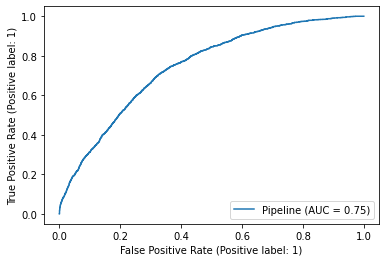

In [173]:
plot_roc_curve(clf, X_test, y_test);

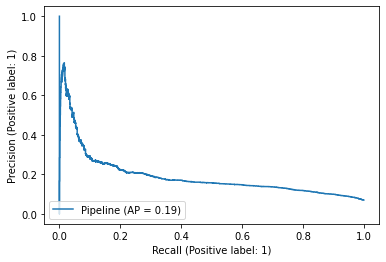

In [181]:
plot_precision_recall_curve(clf, X_test, y_test);

In [192]:
from sklearn.model_selection import GridSearchCV
parameters = {'estimator__n_estimators':[5, 10, 25, 50]}
cv_clf = GridSearchCV(clf, parameters)

In [193]:
cv_clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', None),
                                       ('estimator',
                                        EasyEnsembleClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'estimator__n_estimators': [5, 10, 25, 50]})

In [196]:
cv_clf.best_params_

{'estimator__n_estimators': 5}

In [197]:
clf = make_classifier_pipeline(
    estimator=EasyEnsembleClassifier(random_state=42, n_estimators=5, n_jobs=-1)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,fpr,tnr,fnr,ppv,npv,fit_time
EasyEnsembleClassifier,,0.638,0.686,0.395,0.218,0.128,0.742,0.122,0.691,0.192,0.742,0.369,0.631,0.258,0.128,0.971,4.487


In [199]:
clf.predict_proba(X_test)

array([[0.50282182, 0.49717818],
       [0.49773854, 0.50226146],
       [0.50845258, 0.49154742],
       ...,
       [0.50183343, 0.49816657],
       [0.49550067, 0.50449933],
       [0.50461888, 0.49538112]])

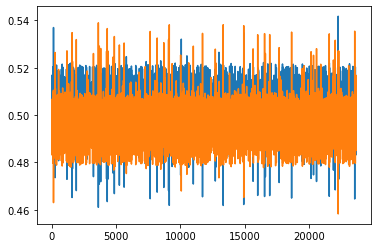

In [202]:
import matplotlib.pyplot as plt
plt.plot(clf.predict_proba(X_test));

In [203]:
clf = make_classifier_pipeline(
    estimator=LogisticRegression()
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,fpr,tnr,fnr,ppv,npv,fit_time
LogisticRegression,,0.933,0.517,0.003,0.066,0.683,0.035,0.034,0.935,0.144,0.035,0.001,0.999,0.965,0.683,0.934,0.708


In [204]:
clf.predict_proba(X_test)

array([[0.929345  , 0.070655  ],
       [0.91009238, 0.08990762],
       [0.97500713, 0.02499287],
       ...,
       [0.95563019, 0.04436981],
       [0.86571344, 0.13428656],
       [0.96858061, 0.03141939]])

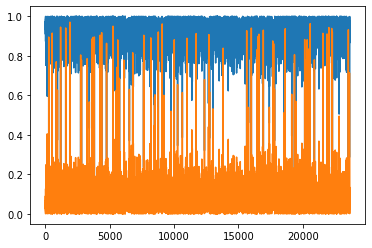

In [205]:
plt.plot(clf.predict_proba(X_test));

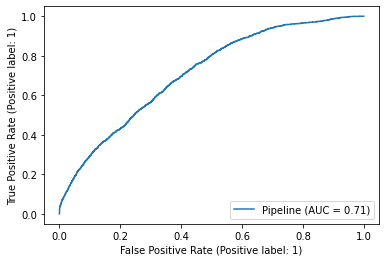

In [206]:
plot_roc_curve(clf, X_test, y_test);

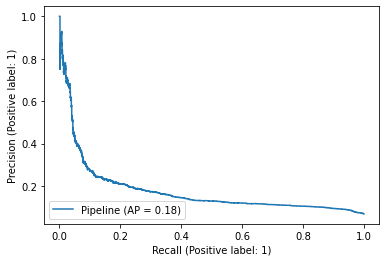

In [207]:
plot_precision_recall_curve(clf, X_test, y_test);

In [208]:
probs = clf.predict_proba(X_test)
preds = clf.predict(X_test)

In [209]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [210]:
probs

array([[0.929345  , 0.070655  ],
       [0.91009238, 0.08990762],
       [0.97500713, 0.02499287],
       ...,
       [0.95563019, 0.04436981],
       [0.86571344, 0.13428656],
       [0.96858061, 0.03141939]])

In [211]:
pred_prob = probs[preds]

In [212]:
pred_prob

array([[0.929345, 0.070655],
       [0.929345, 0.070655],
       [0.929345, 0.070655],
       ...,
       [0.929345, 0.070655],
       [0.929345, 0.070655],
       [0.929345, 0.070655]])

In [213]:
pred_prob = [ p[pd] for (pd, p) in zip(preds, probs)]

In [214]:
pred_prob

[0.9293450048462748,
 0.9100923823732446,
 0.975007129174415,
 0.9648159104597384,
 0.9086862961159722,
 0.9290418483063284,
 0.9658779155528787,
 0.9427599066705217,
 0.9391471519264756,
 0.94772929958639,
 0.9494549826562291,
 0.9603680730023092,
 0.9305944929216837,
 0.9986597067688233,
 0.9627108013650943,
 0.8725852946176279,
 0.9260025652803373,
 0.9081872511441,
 0.9866506370271841,
 0.9593619870086458,
 0.9662246160508078,
 0.9696662254219153,
 0.9681581509412959,
 0.9933170198464968,
 0.9676740239549692,
 0.9463093261718079,
 0.9407074880362694,
 0.9428805164446628,
 0.9852953907318054,
 0.9534200598381296,
 0.8640339346184907,
 0.9498180663341208,
 0.9743924297073322,
 0.9499771976881027,
 0.9518643477271731,
 0.9514386669608228,
 0.9400393407189176,
 0.7513643737187966,
 0.9397451506571118,
 0.9329282066198944,
 0.965317272026406,
 0.9223958770681046,
 0.981309183877243,
 0.9718356555454674,
 0.9811517983505477,
 0.9046773096378593,
 0.8247184640849332,
 0.952735453391605,
 

In [215]:
min(pred_prob)

0.5050812456622613

In [216]:
pred_prob.index(min(pred_prob))

22827

In [217]:
probs[22827]

array([0.50508125, 0.49491875])

In [218]:
probs

array([[0.929345  , 0.070655  ],
       [0.91009238, 0.08990762],
       [0.97500713, 0.02499287],
       ...,
       [0.95563019, 0.04436981],
       [0.86571344, 0.13428656],
       [0.96858061, 0.03141939]])

In [244]:
pp = [ p[1] for p in probs]

In [246]:
max(pp)

0.9696329134175593

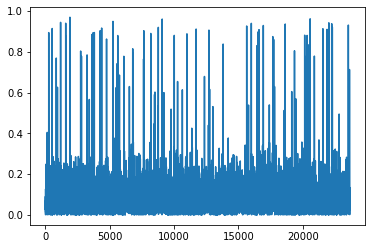

In [248]:
plt.plot(pp);

In [256]:
th = 0.15
prs = [ 1 if p >= th else 0 for p in pp]
np.mean(prs)

0.05956205613797768

In [254]:
np.mean(prs == preds)

1.0

In [255]:
min(prs==preds)

True

In [257]:
metrics.balanced_accuracy_score(y_test, prs)

0.5687416534815177

In [258]:
metrics.f1_score(y_test, prs)

0.2001325381047051

In [259]:
np.mean(pp)

0.06670652506745914

In [260]:
sum(pp)

1578.0095569958078

In [261]:
pp

[0.07065499515372517,
 0.0899076176267554,
 0.024992870825585004,
 0.035184089540261636,
 0.09131370388402778,
 0.07095815169367162,
 0.034122084447121226,
 0.05724009332947832,
 0.06085284807352444,
 0.05227070041361008,
 0.050545017343770954,
 0.039631926997690754,
 0.0694055070783163,
 0.0013402932311767232,
 0.037289198634905665,
 0.1274147053823721,
 0.07399743471966266,
 0.09181274885590002,
 0.013349362972815882,
 0.04063801299135422,
 0.03377538394919217,
 0.030333774578084727,
 0.03184184905870418,
 0.0066829801535031935,
 0.03232597604503086,
 0.05369067382819209,
 0.059292511963730636,
 0.057119483555337275,
 0.014704609268194575,
 0.04657994016187042,
 0.13596606538150935,
 0.05018193366587924,
 0.025607570292667796,
 0.050022802311897256,
 0.04813565227282694,
 0.048561333039177174,
 0.059960659281082435,
 0.24863562628120336,
 0.06025484934288821,
 0.06707179338010558,
 0.034682727973594,
 0.07760412293189548,
 0.018690816122757,
 0.028164344454532645,
 0.0188482016494522

In [262]:
sum(y_test)

1609

In [263]:
clf = make_classifier_pipeline(
    estimator=EasyEnsembleClassifier(random_state=42, n_estimators=5, n_jobs=-1)
)

tracker.add_classifier(clf)

,,acc,bal_acc,pred_dist,f1,precision,recall,jaccard,fmi,mcc,tpr,fpr,tnr,fnr,ppv,npv,fit_time
EasyEnsembleClassifier,,0.638,0.686,0.395,0.218,0.128,0.742,0.122,0.691,0.192,0.742,0.369,0.631,0.258,0.128,0.971,4.139


In [265]:
probs = clf.predict_proba(X_test)
pp = [ p[1] for p in probs]

In [266]:
sum(pp)

11768.418974897742

In [267]:
np.mean(pp)

0.4974813567339293